In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scout import io

In [10]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock/'

In [11]:
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
analysis.head()

,type
path,
20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50,Zika
20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50,Zika
20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50,Zika
20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50,Zika
20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50,Zika


In [12]:
# Move original "type" to a new folder field
analysis['folder'] = analysis['type']

# Swap Zika 1 and 5 for Mock 1 and 5
loc = np.where(np.asarray(['zika1' in p for p in analysis.index]))[0]
analysis['type'].iloc[loc] = 'Zika_mock'
loc = np.where(np.asarray(['zika5' in p for p in analysis.index]))[0]
analysis['type'].iloc[loc] = 'Zika_mock'
loc = np.where(np.asarray(['ctrl1' in p for p in analysis.index]))[0]
analysis['type'].iloc[loc] = 'Zika'
loc = np.where(np.asarray(['ctrl5' in p for p in analysis.index]))[0]
analysis['type'].iloc[loc] = 'Zika'

analysis

,type,folder
path,,
20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50,Zika_mock,Zika
20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50,Zika,Zika
20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50,Zika,Zika
20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50,Zika,Zika
20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50,Zika_mock,Zika
20190625_17_15_27_AA_ef24-zika6_488LP25_561LP140_642LP50,Zika,Zika
20190625_12_18_15_AA_ef24-ctrl1_488LP14_561LP140_642LP50,Zika,Zika_mock
20190625_12_38_41_AA_ef24-ctrl2_488LP13_561LP140_642LP50,Zika_mock,Zika_mock
20190625_13_00_22_AA_ef24-ctrl3_488LP15_561LP140_642LP50,Zika_mock,Zika_mock


In [22]:
zikas = analysis.where(analysis['type'] == 'Zika').dropna()
mocks = analysis.where(analysis['type'] == 'Zika_mock').dropna()

len(zikas), len(mocks)

(6, 10)

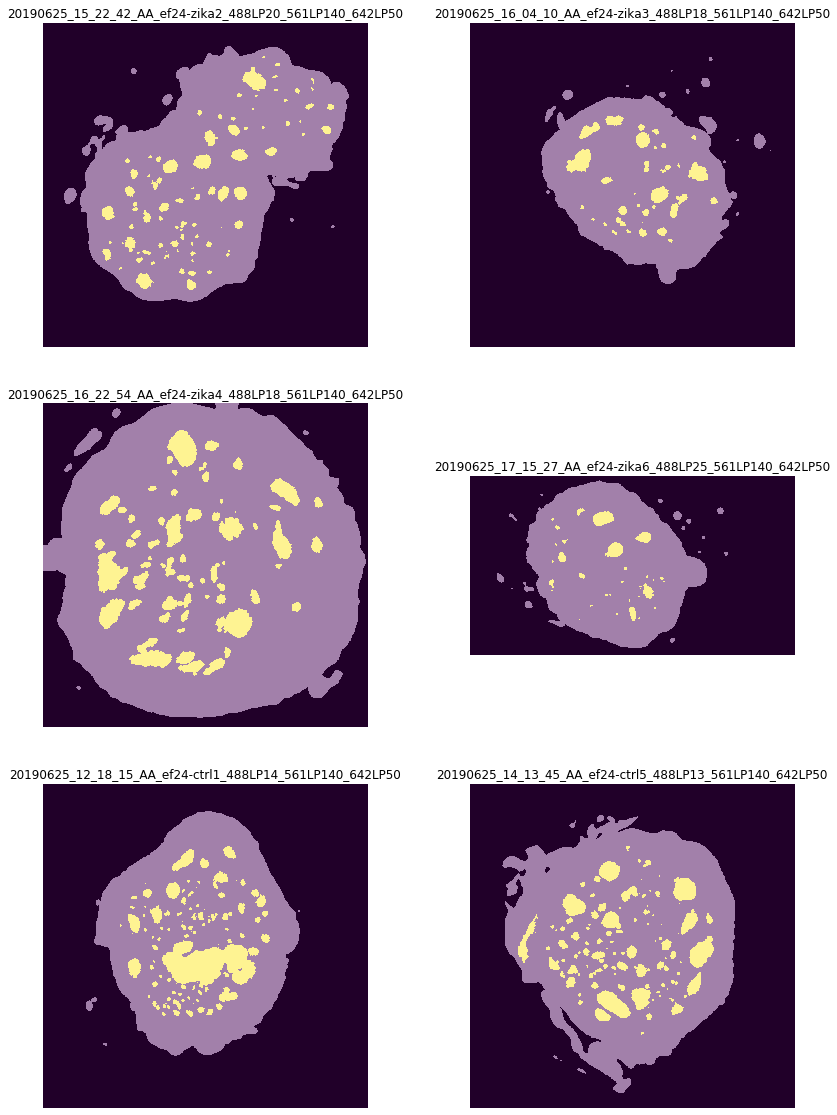

In [26]:
plt.figure(figsize=(12, 16))

for i, (f, p) in enumerate(zip(zikas['folder'], zikas.index)):
    org_dir = os.path.join(working_dir, f, p, 'dataset')
    ventricles = io.imread(os.path.join(org_dir, 'segment_ventricles.tif'))
    foreground = io.imread(os.path.join(org_dir, 'segment_foreground.tif'))
    mip_ventricles = ventricles.max(axis=0)
    mip_foreground = foreground.max(axis=0)
    
    plt.subplot(len(zikas) // 2, 2, i + 1)
    plt.imshow(mip_foreground, cmap='gray')
    plt.imshow(mip_ventricles, alpha=0.5)
    plt.axis('off')
    plt.title(p)

plt.tight_layout()
plt.show()

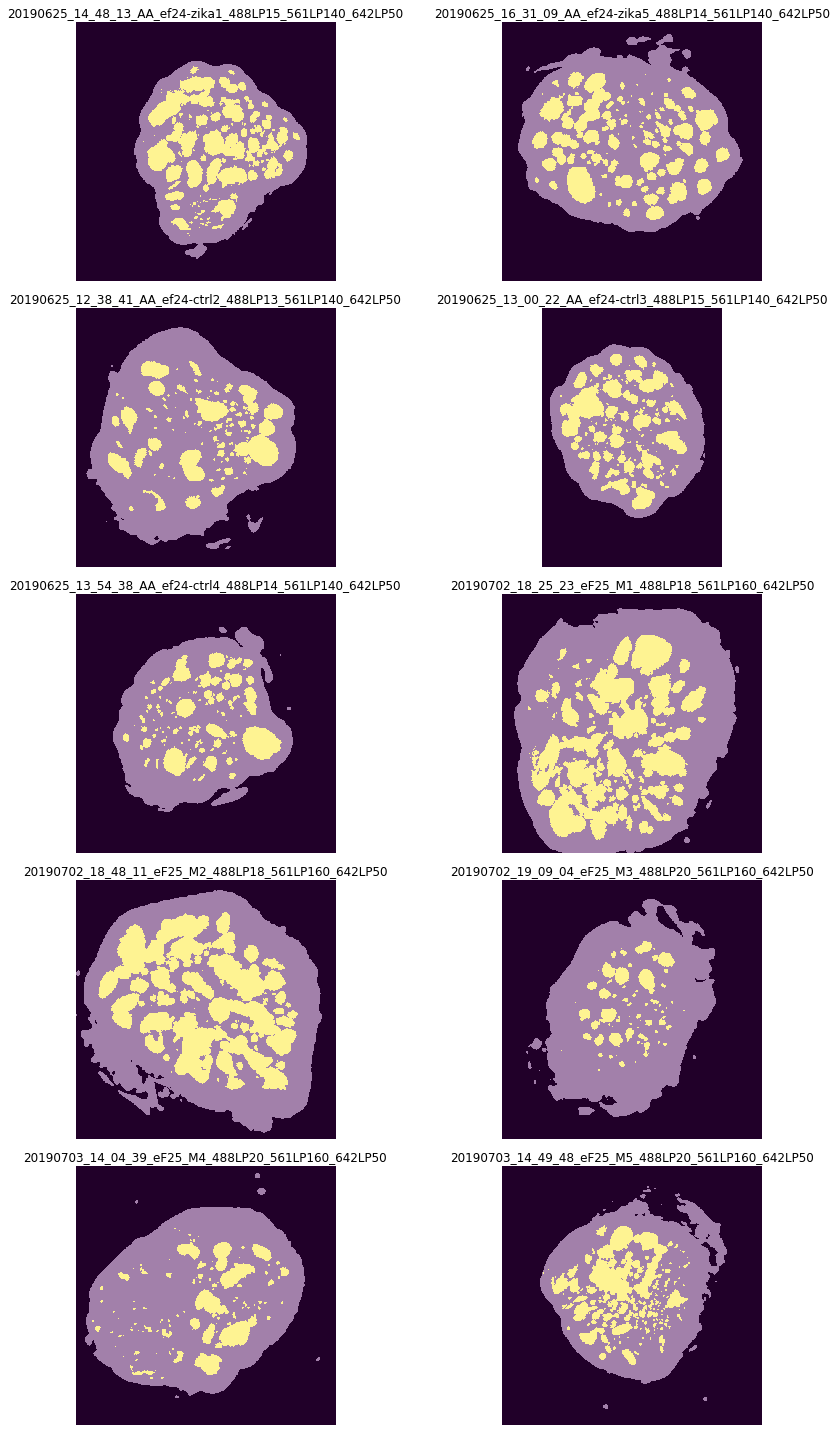

In [27]:
plt.figure(figsize=(12, 20))

for i, (f, p) in enumerate(zip(mocks['folder'], mocks.index)):
    org_dir = os.path.join(working_dir, f, p, 'dataset')
    ventricles = io.imread(os.path.join(org_dir, 'segment_ventricles.tif'))
    foreground = io.imread(os.path.join(org_dir, 'segment_foreground.tif'))
    mip_ventricles = ventricles.max(axis=0)
    mip_foreground = foreground.max(axis=0)
    
    plt.subplot(len(mocks) // 2, 2, i + 1)
    plt.imshow(mip_foreground, cmap='gray')
    plt.imshow(mip_ventricles, alpha=0.5)
    plt.axis('off')
    plt.title(p)

plt.tight_layout()
plt.show()